In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv")

# Descriptive Statistics

- 1) How many students are in the dataset?
- 2) What is the average anxiety level of students in the dataset?
- 3) How many students have reported a history of mental health issues?

In [8]:
# 1
num_students = len(df)

# 2
average_anxiety_level = df['anxiety_level'].mean()

# 3
students_with_mental_health_history = df[df['mental_health_history'] == 1]
num_students_with_mental_health_history = len(students_with_mental_health_history)

print("1) Number of students in the dataset:", num_students)
print("2) Average anxiety level of students:", average_anxiety_level)
print("3) Number of students with a history of mental health issues:", num_students_with_mental_health_history)

1) Number of students in the dataset: 1100
2) Average anxiety level of students: 11.063636363636364
3) Number of students with a history of mental health issues: 542


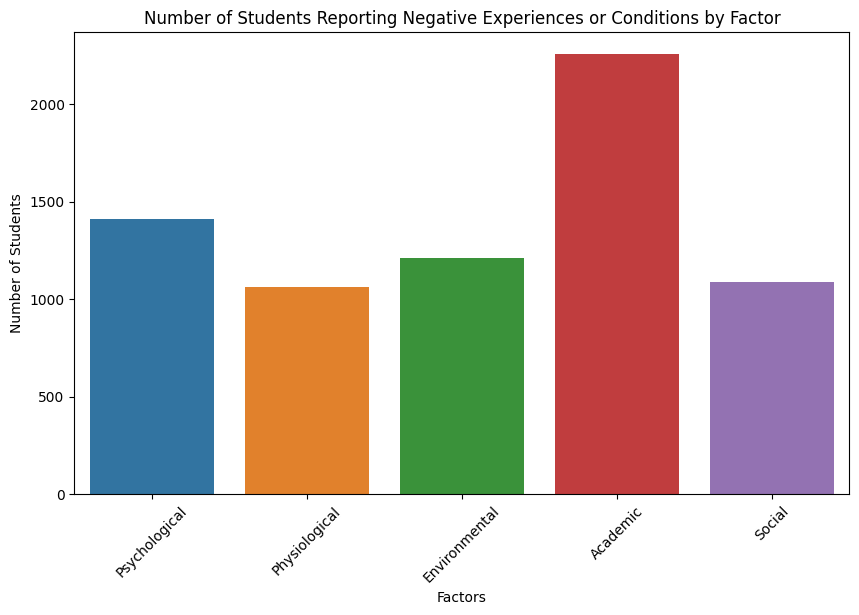

In [9]:
# Define the relevant columns
psychological_factors = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_factors = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_factors = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_factors = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_factors = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

# Calculate the number of students with negative experiences or conditions for each factor
num_students_with_negative_psychological = df[psychological_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_physiological = df[physiological_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_environmental = df[environmental_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_academic = df[academic_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_social = df[social_factors].apply(lambda x: x.gt(3).sum(), axis=1)

# Create a bar chart for the number of students with various negative experiences or conditions
factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']
negative_experiences = [
    num_students_with_negative_psychological.sum(),
    num_students_with_negative_physiological.sum(),
    num_students_with_negative_environmental.sum(),
    num_students_with_negative_academic.sum(),
    num_students_with_negative_social.sum()
]

plt.figure(figsize=(10, 6))
sns.barplot(x=factors, y=negative_experiences)
plt.title("Number of Students Reporting Negative Experiences or Conditions by Factor")
plt.xlabel("Factors")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

# Psychological Factors

- 1) How many students have a self-esteem level below the average?
- 2) What percentage of students have reported experiencing depression?

In [10]:
# 1
average_self_esteem = df['self_esteem'].mean()
students_below_average_self_esteem = df[df['self_esteem'] < average_self_esteem]
num_students_below_average_self_esteem = len(students_below_average_self_esteem)


# 2
percentage_students_experiencing_depression = (df['depression'].sum() / num_students) * 100

print("1) Number of students with self-esteem below the average:", num_students_below_average_self_esteem)
print(f"2) Percentage of students experiencing depression: {percentage_students_experiencing_depression:.2f}%")

1) Number of students with self-esteem below the average: 507
2) Percentage of students experiencing depression: 1255.55%


# NOTE

- in order to have the percentage of students experience depression in a logical scale which is more understandable, we can set a threshold and create a new binary column

In [11]:
# Define the threshold and create the new binary column
threshold = 10
df['depression_binary'] = (df['depression'] > threshold).astype(int)

# Ensure 'num_students' is defined. If not, define it.
if 'num_students' not in locals():
    num_students = len(df)


percentage_students_experiencing_depression = (df['depression_binary'].sum() / num_students) * 100

print(f"2) Percentage of students experiencing depression: {percentage_students_experiencing_depression:.2f}%")

2) Percentage of students experiencing depression: 56.36%


# Physiological Factors

- 1) How many students experience headaches frequently?
- 2) What is the average blood pressure reading among the students?
- 3) How many students rate their sleep quality as poor?

In [12]:
# 1
students_with_frequent_headaches = df[df['headache'] == 1]
num_students_with_frequent_headaches = len(students_with_frequent_headaches)

# 2
average_blood_pressure = df['blood_pressure'].mean()

# 3
students_with_poor_sleep_quality = df[df['sleep_quality'] < 3]
num_students_with_poor_sleep_quality = len(students_with_poor_sleep_quality)

print("1) Number of students experiencing frequent headaches:", num_students_with_frequent_headaches)
print("2) Average blood pressure reading among the students:", average_blood_pressure)
print("3) Number of students with poor sleep quality:", num_students_with_poor_sleep_quality)

1) Number of students experiencing frequent headaches: 331
2) Average blood pressure reading among the students: 2.1818181818181817
3) Number of students with poor sleep quality: 550


# Environmental Factors

- 1) How many students live in conditions with high noise levels?
- 2) What percentage of students feel unsafe in their living conditions?
- 3) How many students have reported not having their basic needs met?

In [13]:
# 1
students_in_high_noise_conditions = df[df['noise_level'] > 3]
num_students_in_high_noise_conditions = len(students_in_high_noise_conditions)

# 2
percentage_students_feeling_unsafe = (df['safety'].sum() / num_students) * 100

# 3
students_without_basic_needs = df[df['basic_needs'] == 0]
num_students_without_basic_needs = len(students_without_basic_needs)

print("1) Number of students living in high noise conditions:", num_students_in_high_noise_conditions)
print("2) Percentage of students feeling unsafe in their living conditions:", percentage_students_feeling_unsafe)
print("3) Number of students without their basic needs met:", num_students_without_basic_needs)

1) Number of students living in high noise conditions: 274
2) Percentage of students feeling unsafe in their living conditions: 273.72727272727275
3) Number of students without their basic needs met: 40


# NOTE

- in order to have the Percentage of students feeling unsafe in their living conditions in a logical scale which is more understandable, we can set a threshold and create a new binary column (Like earlier we've created a column for depression)

In [24]:
# Create a binary column for safety (1 indicates feeling unsafe, 0 indicates feeling safe)
threshold_for_safety = 2
df['feeling_unsafe'] = (df['safety'] <= threshold_for_safety).astype(int)


percentage_students_feeling_unsafe = (df['feeling_unsafe'].sum() / num_students) * 100

print(f"2) Percentage of students feeling unsafe in their living conditions: {percentage_students_feeling_unsafe:.2f}%")

2) Percentage of students feeling unsafe in their living conditions: 51.36%


# Academic Factors

- 1) How many students rate their academic performance as below average?
- 2) What is the average study load reported by students?
- 3) How many students have concerns about their future careers?

In [14]:
# 1
students_below_average_academic_performance = df[df['academic_performance'] < 3]
num_students_below_average_academic_performance = len(students_below_average_academic_performance)

# 2
average_study_load = df['study_load'].mean()

# 3
students_with_future_career_concerns = df[df['future_career_concerns'] == 1]
num_students_with_future_career_concerns = len(students_with_future_career_concerns)

print("1) Number of students with below-average academic performance:", num_students_below_average_academic_performance)
print("2) Average study load reported by students:", average_study_load)
print("3) Number of students with concerns about their future careers:", num_students_with_future_career_concerns)

1) Number of students with below-average academic performance: 561
2) Average study load reported by students: 2.6218181818181816
3) Number of students with concerns about their future careers: 327


# Social Factors

- 1) How many students feel they have strong social support?
- 2) What percentage of students have experienced bullying?
- 3) How many students participate in extracurricular activities?

In [15]:
# 1
students_with_strong_social_support = df[df['social_support'] > 3]
num_students_with_strong_social_support = len(students_with_strong_social_support)

# 2
percentage_students_experiencing_bullying = (df['bullying'].sum() / num_students) * 100

# 3
students_participating_in_extracurricular = df[df['extracurricular_activities'] == 1]
num_students_participating_in_extracurricular = len(students_participating_in_extracurricular)

print("1) Number of students with strong social support:", num_students_with_strong_social_support)
print("2) Percentage of students experiencing bullying:", percentage_students_experiencing_bullying)
print("3) Number of students participating in extracurricular activities:", num_students_participating_in_extracurricular)

1) Number of students with strong social support: 0
2) Percentage of students experiencing bullying: 261.72727272727275
3) Number of students participating in extracurricular activities: 184


# NOTE

- in order to have the Percentage of students experiencing bullying in a logical scale which is more understandable, we can set a threshold and create a new binary column (Like earlier we've created a column for depression)

In [16]:
# Define the threshold and create the new binary column for bullying
bullying_threshold = 3
df['bullying_binary'] = (df['bullying'] > bullying_threshold).astype(int)

# Ensure 'num_students' is defined. If not, define it.
if 'num_students' not in locals():
    num_students = len(df)

# Compute the percentage using the new binary column
percentage_students_experiencing_bullying = (df['bullying_binary'].sum() / num_students) * 100

print(f"2) Percentage of students experiencing bullying: {percentage_students_experiencing_bullying:.2f}%")

2) Percentage of students experiencing bullying: 32.73%


# Comparative Analysis

- 1) Is there a correlation between anxiety level and academic performance?
- 2) Do students with poor sleep quality also report higher levels of depression?
- 3) Are students who experience bullying more likely to have a history of mental health issues?

In [17]:
# 1
correlation_anxiety_academic = df['anxiety_level'].corr(df['academic_performance'])

# 2
correlation_sleep_depression = df['sleep_quality'].corr(df['depression'])

# 3
students_with_bullying_history = df[df['bullying'] == 1]
students_with_bullying_history_and_mental_health_history = students_with_bullying_history[
    students_with_bullying_history['mental_health_history'] == 1]
percentage_students_with_bullying_and_mental_health_history = (
    len(students_with_bullying_history_and_mental_health_history) / len(students_with_bullying_history)) * 100

print("1) Correlation between anxiety level and academic performance:", correlation_anxiety_academic)
print("2) Correlation between sleep quality and depression:", correlation_sleep_depression)
print("3) Percentage of students with bullying history and mental health history:", percentage_students_with_bullying_and_mental_health_history)

1) Correlation between anxiety level and academic performance: -0.6496011296145091
2) Correlation between sleep quality and depression: -0.6931609071393333
3) Percentage of students with bullying history and mental health history: 4.179104477611941


# General Exploration

- 1) Which factor (Psychological, Physiological, Environmental, Academic, Social) has the highest number of students reporting negative experiences or conditions?
- 2) Are there any noticeable trends or patterns when comparing different factors?
- 3) Which specific feature within each factor has the most significant impact on student stress, based on the dataset?

In [18]:
# 1

factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']
negative_experiences = [num_students_below_average_self_esteem, 
                        num_students_with_frequent_headaches, 
                        num_students_in_high_noise_conditions, 
                        num_students_without_basic_needs, 
                        len(students_with_bullying_history)]
factor_with_most_negatives = factors[negative_experiences.index(max(negative_experiences))]

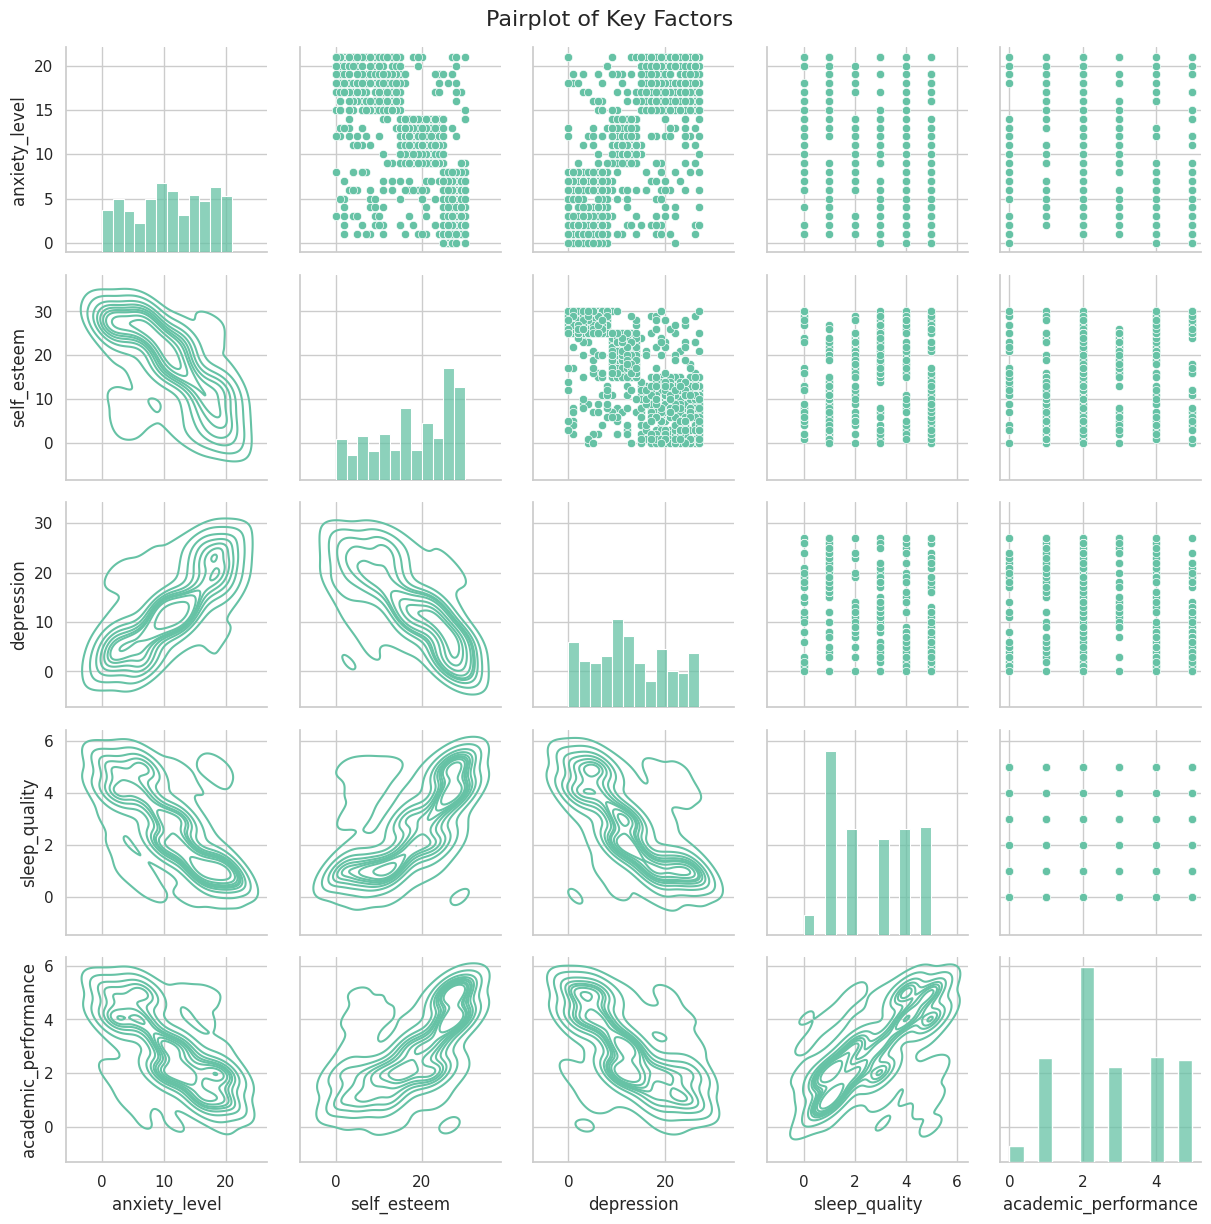

Factor: Psychological
- Feature: anxiety_level, Importance: 0.26089714628591354
- Feature: self_esteem, Importance: 0.5040584604550429
- Feature: mental_health_history, Importance: 0.01884723408818029
- Feature: depression, Importance: 0.21619715917086332

Factor: Physiological
- Feature: headache, Importance: 0.4028829463071532
- Feature: blood_pressure, Importance: 0.05249346972575476
- Feature: sleep_quality, Importance: 0.4739849211246871
- Feature: breathing_problem, Importance: 0.070638662842405

Factor: Environmental
- Feature: noise_level, Importance: 0.1529315919265391
- Feature: living_conditions, Importance: 0.12487823031010636
- Feature: safety, Importance: 0.3085072402464035
- Feature: basic_needs, Importance: 0.4136829375169512

Factor: Academic
- Feature: academic_performance, Importance: 0.4289885934824254
- Feature: study_load, Importance: 0.09712398953805111
- Feature: teacher_student_relationship, Importance: 0.24189621240856585
- Feature: future_career_concerns, Imp

In [19]:
# 2&3

# Set a custom style for the plot
sns.set(style="whitegrid", palette="Set2")


factors_to_plot = df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']]

g = sns.PairGrid(factors_to_plot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")
g.map_diag(sns.histplot, kde_kws={'color': 'C0'})


plt.subplots_adjust(top=0.95)
g.fig.suptitle("Pairplot of Key Factors", size=16)

# Show the plot
plt.show()



# use perform feature importance analysis To determine which specific feature within each factor has the most significant impact.

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Define factors
factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']

# Define feature sets for each factor

psychological_features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_features = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_features = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_features = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_features = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

# Initialize a Random Forest Regressor
model = RandomForestRegressor()


feature_importance = {}

# Loop through each factor and analyze feature importance

for factor, features in zip(factors, [psychological_features, physiological_features, environmental_features, academic_features, social_features]):
    X = df[features]
    y = df['stress_level']

    model.fit(X, y)

    # Get feature importances
    importance = model.feature_importances_

    
    # Store feature importances in the dictionary
    
    feature_importance[factor] = {feature: importance_value for feature, importance_value in zip(features, importance)}


    # Print the feature importance for each factor

for factor, importance_dict in feature_importance.items():
    print(f"Factor: {factor}")
    for feature, importance_value in importance_dict.items():
        print(f"- Feature: {feature}, Importance: {importance_value}")
    print()

# Correlation Heatmap of Key Factors

- create a heatmap to visualize correlations between key factors. This helps you identify strong positive or negative relationships

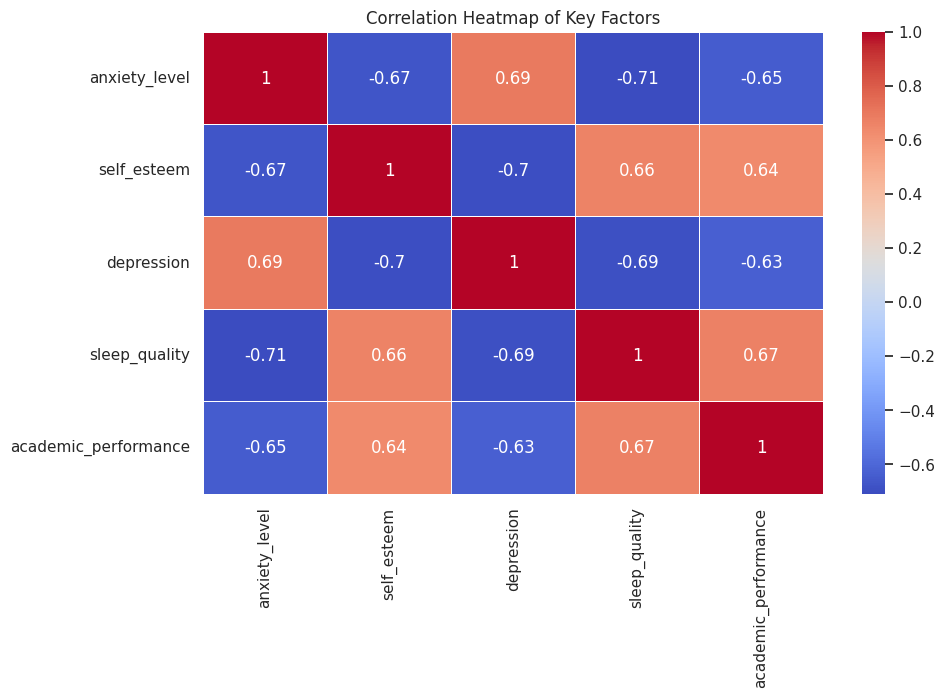

In [20]:
correlation_matrix = df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Key Factors")
plt.show()

# Box Plots

- use box plots to identify trends and variations in factors. This is useful for comparing distributions

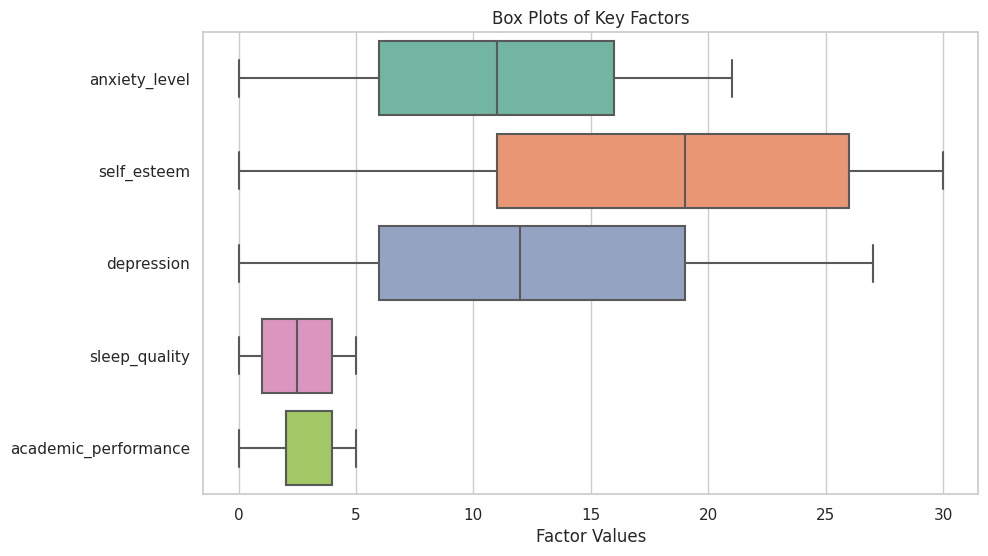

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']], orient='h')
plt.title("Box Plots of Key Factors")
plt.xlabel("Factor Values")
plt.show()

# Determining Specific Feature Impact

- To visualize feature importance within each factor, create bar charts for each factor's features.

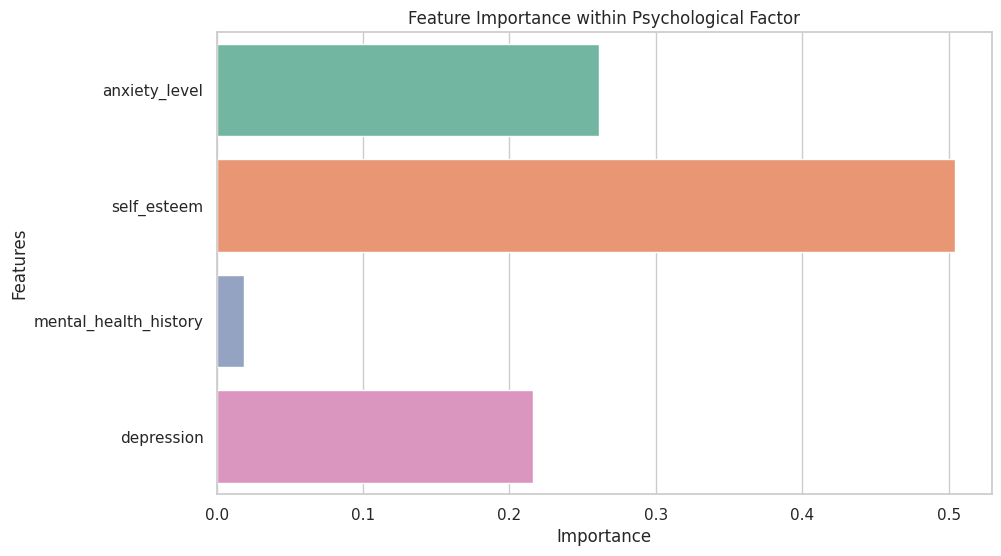

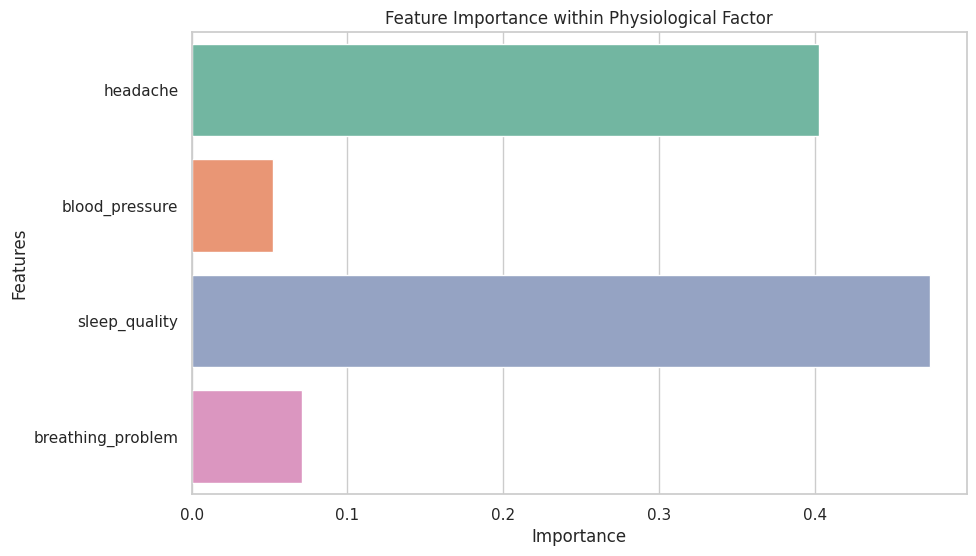

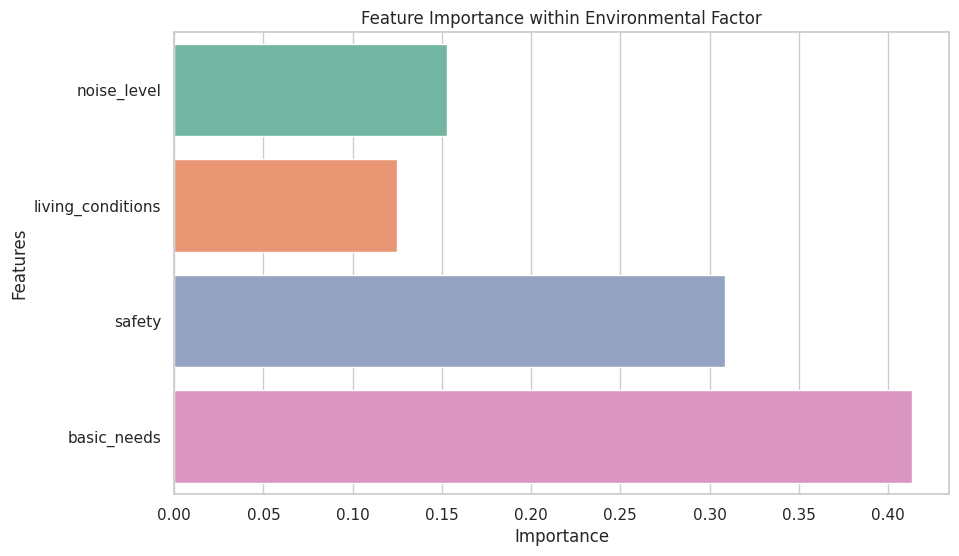

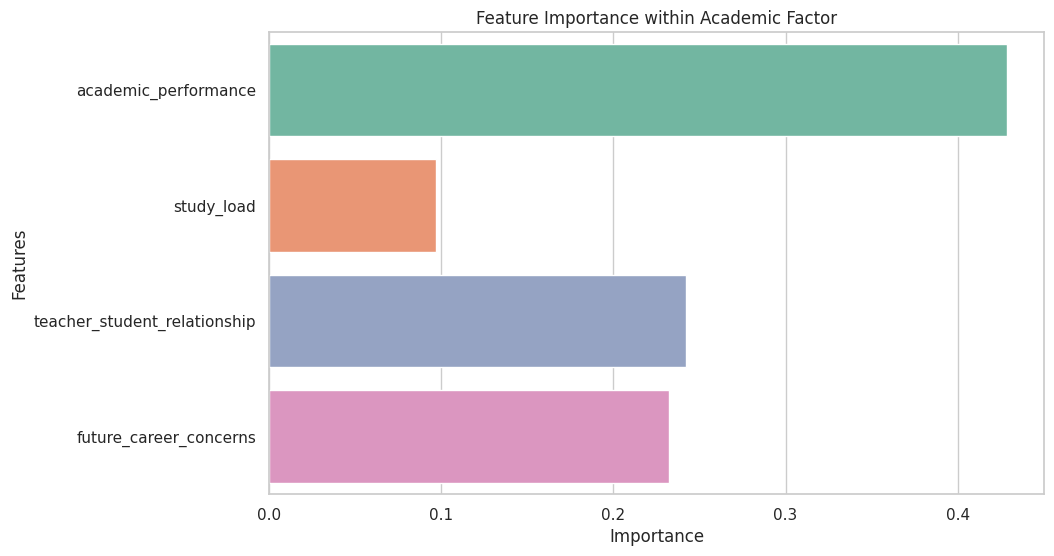

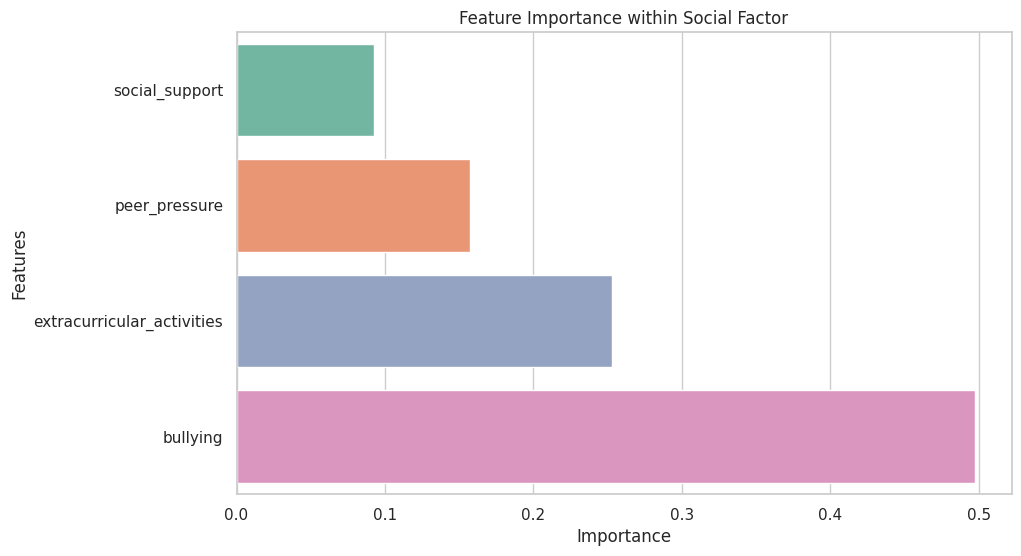

In [22]:
# Define feature importance for each factor

psychological_feature_importance = feature_importance['Psychological']
physiological_feature_importance = feature_importance['Physiological']
environmental_feature_importance = feature_importance['Environmental']
academic_feature_importance = feature_importance['Academic']
social_feature_importance = feature_importance['Social']



# Create bar charts for feature importance within each factor

def plot_feature_importance(factor_name, importance_dict):
    features = list(importance_dict.keys())
    importance = list(importance_dict.values())
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance, y=features, orient='h')
    plt.title(f"Feature Importance within {factor_name} Factor")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_feature_importance('Psychological', psychological_feature_importance)
plot_feature_importance('Physiological', physiological_feature_importance)
plot_feature_importance('Environmental', environmental_feature_importance)
plot_feature_importance('Academic', academic_feature_importance)
plot_feature_importance('Social', social_feature_importance)

In [23]:
# THE END :) 